##**INTRODUCTION** 
This case study is the Capstone Project of **Google Data Analytics Professional Certificate**. The 6 steps of Data Analysis is used to present this analysis.

Title: **Bellabeat Case Study**

Author: *Nitesh Thapa*

----------------

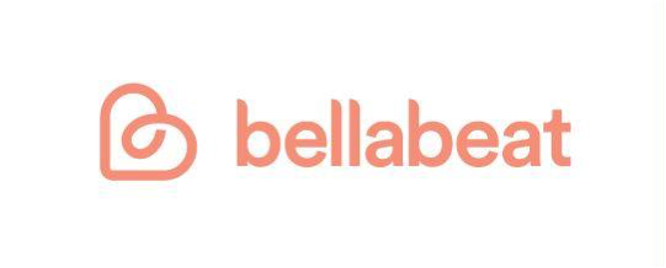

## **Case Study: How Can a Wellness Technology Company Play It Smart?**

In [ ]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time

In [ ]:
#Read CSV file
from google.colab import files
uploaded = files.upload()

Saving dailyActivity_merged.csv to dailyActivity_merged.csv


In [ ]:
import io

daily_activity = pd.read_csv(io.BytesIO(uploaded['dailyActivity_merged.csv']))

### Data cleaning and manipulation
- Get more information about data

- Check for null or missing values


In [ ]:
# preview first 10 rows with all columns
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


##Find Null or missing values

In [ ]:
# Obtain the # of missing data points per column
missing_values_count = daily_activity.isnull().sum()


In [ ]:
# Look at the # of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

###Finding out the basic information of daily_activity:

- no. of rows and columns
- name of columns
- type of value

In [ ]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

### Counting the unique ID and to confirm whether data set has 30 IDs.

In [ ]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
print("# of unique ID: " + str(unique_id))

# of unique ID: 33


### From the above observation, I found out that:

- Data frame has 940 rows and 15 columns.

- There is no typo, Null or missing values.

- ActivityDate is classified as object dtype, which is incorrect and needs to be converted to datetime64 dtype.

- There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.

The following data manipulations are performed:

- Convert ActivityDate to datatime64 dtype.

- Convert format of ActivityDate to yyyy-mm-dd.

- Create new column DayOfTheWeek by separating the date into day of the week for further analysis.

- Create new column TotalMins being the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes and SedentaryMinutes.

- Create new column TotalHours by converting new column in #4 to number of hours.

- Rearrange and rename columns.


#####Converting ActivityDate from object to datatime64 dtype and converting format of ActivityDate to yyyy-mm-dd. Then, printing head to confirm whether it has been updated to datatime64 dtype and dates to yyyy-mm-dd.

In [ ]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 940, dtype: datetime64[ns]

In [ ]:
# re-print information to confirm
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
# print the first 5 rows of "ActivityDate" to confirm
daily_activity["ActivityDate"].head()

0    4/12/2016
1    4/13/2016
2    4/14/2016
3    4/15/2016
4    4/16/2016
Name: ActivityDate, dtype: object

#####Creating new list with rearranged column names and renaming daily_activity to a shorter name df_activity.

In [ ]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)


,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,4/12/2016,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,4/13/2016,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,4/14/2016,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,4/15/2016,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,4/16/2016,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


####Creating new column by separating the date into day of the week for further analysis.

In [ ]:
# create new column "DayOfTheWeek" to represent day of the week

df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'])

df_activity['DayOfTheWeek'] = df_activity['ActivityDate'].dt.day_name()

# print 1st 5 rows to confirm
df_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

Rearranging and renaming columns from XxxYyy to xxx_yyy (formatting the column name)

In [ ]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories' 'day_of_week']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories,day_of_week
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985,Tuesday
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797,Wednesday
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776,Thursday
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745,Friday
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863,Saturday


Creating new column total_mins being the sum of total time logged.

In [ ]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]

df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

Creating new column by converting total-mins to number of hours.

In [ ]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

#print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

###This completes the data cleaning and manipulation. Now, the data is ready to be analyzed. 

##**STEP** **4**: **ANALYZE**

###Perform calculations

- count-no. of rows
- mean(average)
- std(standard deviation)
- min and max
- percentiles 25%, 50%, 75%


In [ ]:
#general statistics
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


##Interpreting statistical findings:

1. As recommended by CDC, an adult female has walk atleast 10,000 steps or 8km per day for weight loss, fitness and be healthy. But the data shows that on average, users logged 7,638 steps or 5.5 km which is not adequate to be healthy. [Source: Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

2. Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

3. Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. [Source: Health Line article](https://https://www.healthline.com/health/fitness-exercise/how-many-calories-do-i-burn-a-day#Burning-calories)

#**STEP 5: SHARE**

In this step, we are creating visualizations and communicating our findings based on our analysis.

###Data Visualisation and Findings

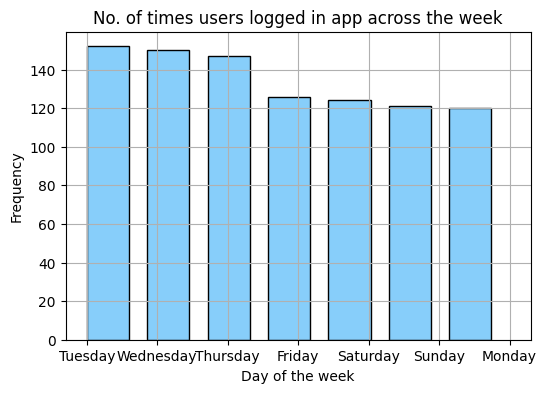

In [ ]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df_activity.day_of_the_week, bins = 7, 
         width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

## Frequency of usage across the week
In this histogram, I am looking at the frequency of FitBit app usage each days of the week.

- I found that users prefer or remember to track their activity on the app during midweek from Tuesday to Friday.

- 2 The frequency dropped on Friday and continue on weekends and Monday.

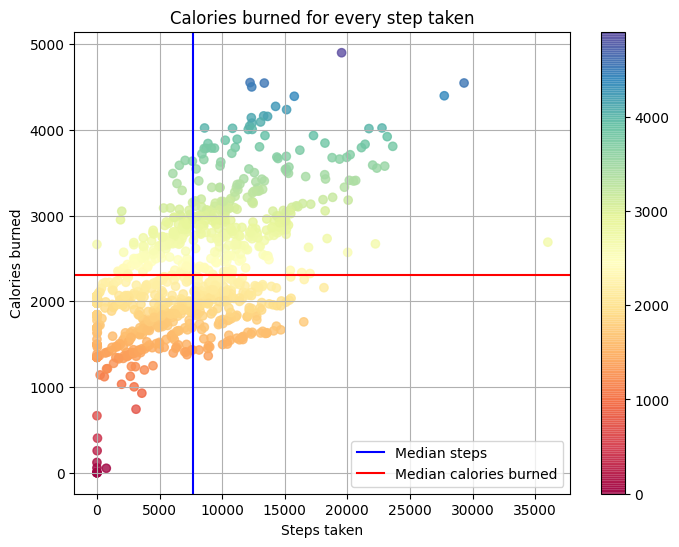

In [ ]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

SyntaxError: ignored

## Calories burned for every step taken
From the scatter plot, I discovered that:

1. There is a positive correlation between variables.

2. We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

3. Noted a few outliers:

- Zero steps with zero to minimal calories burned.
- 1 observation of > 35,000 steps with < 3,000 calories burned.
- Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

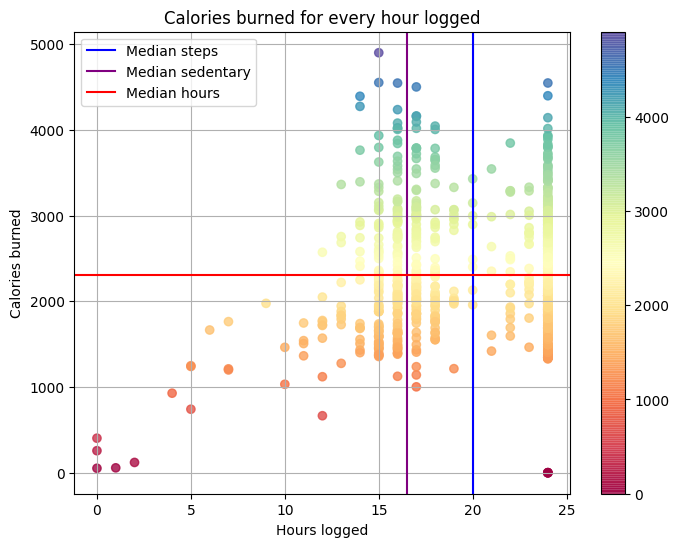

In [ ]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

## Calories burned for every hour logged
The scatter plot is showing:

1. A weak positive correlation whereby the increase of hours logged does not translate to more calories being burned. That is largely due to the average sedentary hours (purple line) plotted at the 16 to 17 hours range.

2. Again, we can see a few outliers:

- The same zero value outliers
- An unusual red dot at the 24 hours with zero calorie burned which may be due to the same reasons as above.

## **STEP 6: ACT**
In the final step, I will be delivering insights and providing recommendations based on the analysis.

1. What are the trends identified?

- Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

- Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

2. How could these trends apply to Bellabeat customers?

- Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well be applied to Bellabeat customers.
3. How could these trends help influence Bellabeat marketing strategy?

- Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

- On weekends, Bellabeat app can also prompt notification to encourage users to exercise.